In [143]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
load_df = load_breast_cancer()

In [10]:
load_df['data'].shape, load_df['target'].shape

((569, 30), (569,))

In [40]:
df = pd.DataFrame(load_df['data'], columns=load_df['feature_names'])
df['target'] = load_df['target']

In [41]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='mean radius', ylabel='mean concavity'>

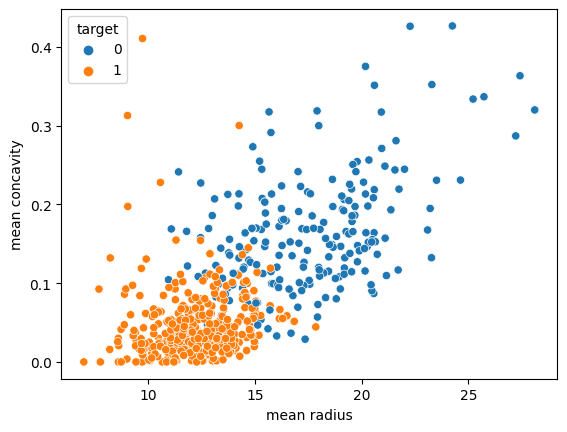

In [72]:
sns.scatterplot(df, x='mean radius', y='mean concavity', hue='target')

In [20]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='target', ylabel='count'>

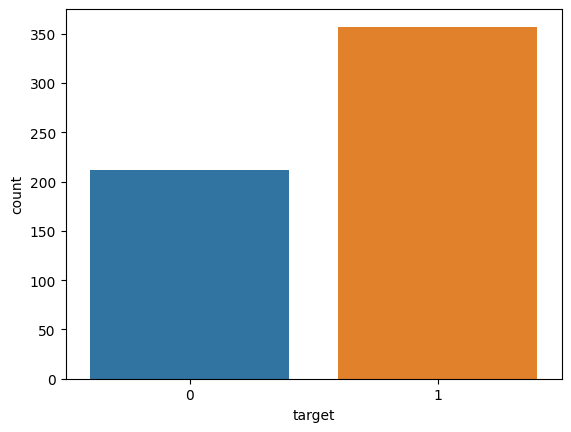

In [43]:
sns.countplot(df, x='target')

In [46]:
X = df.drop(columns='target')
y = df['target']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [68]:
model = LogisticRegression(max_iter=100)
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [69]:
pred = model.predict(scaled_X_test)

In [70]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       104

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## ConfusionMatrix

In [104]:
cm = confusion_matrix(pred, y_test)

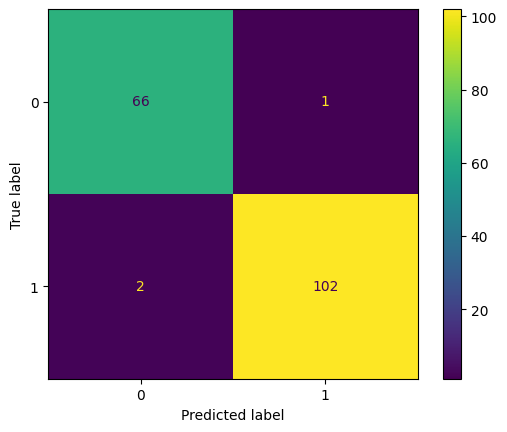

In [108]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Roc AUC

In [89]:
prob_pred = model.predict_proba(scaled_X_test)[:, 1]

In [136]:
auc = roc_auc_score(y_test.values, prob_pred)

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

In [120]:
print(f'FPR: {fpr}, \nTPR: {tpr} \n{thresholds}')

FPR: [0.         0.         0.         0.01470588 0.01470588 0.02941176
 0.02941176 0.04411765 0.04411765 1.        ], 
TPR: [0.         0.00970874 0.54368932 0.54368932 0.87378641 0.87378641
 0.99029126 0.99029126 1.         1.        ] 
[2.00000000e+00 9.99999996e-01 9.97972482e-01 9.97747231e-01
 9.49062752e-01 9.19123253e-01 5.89989227e-01 4.18161219e-01
 3.05481731e-01 1.46252874e-18]


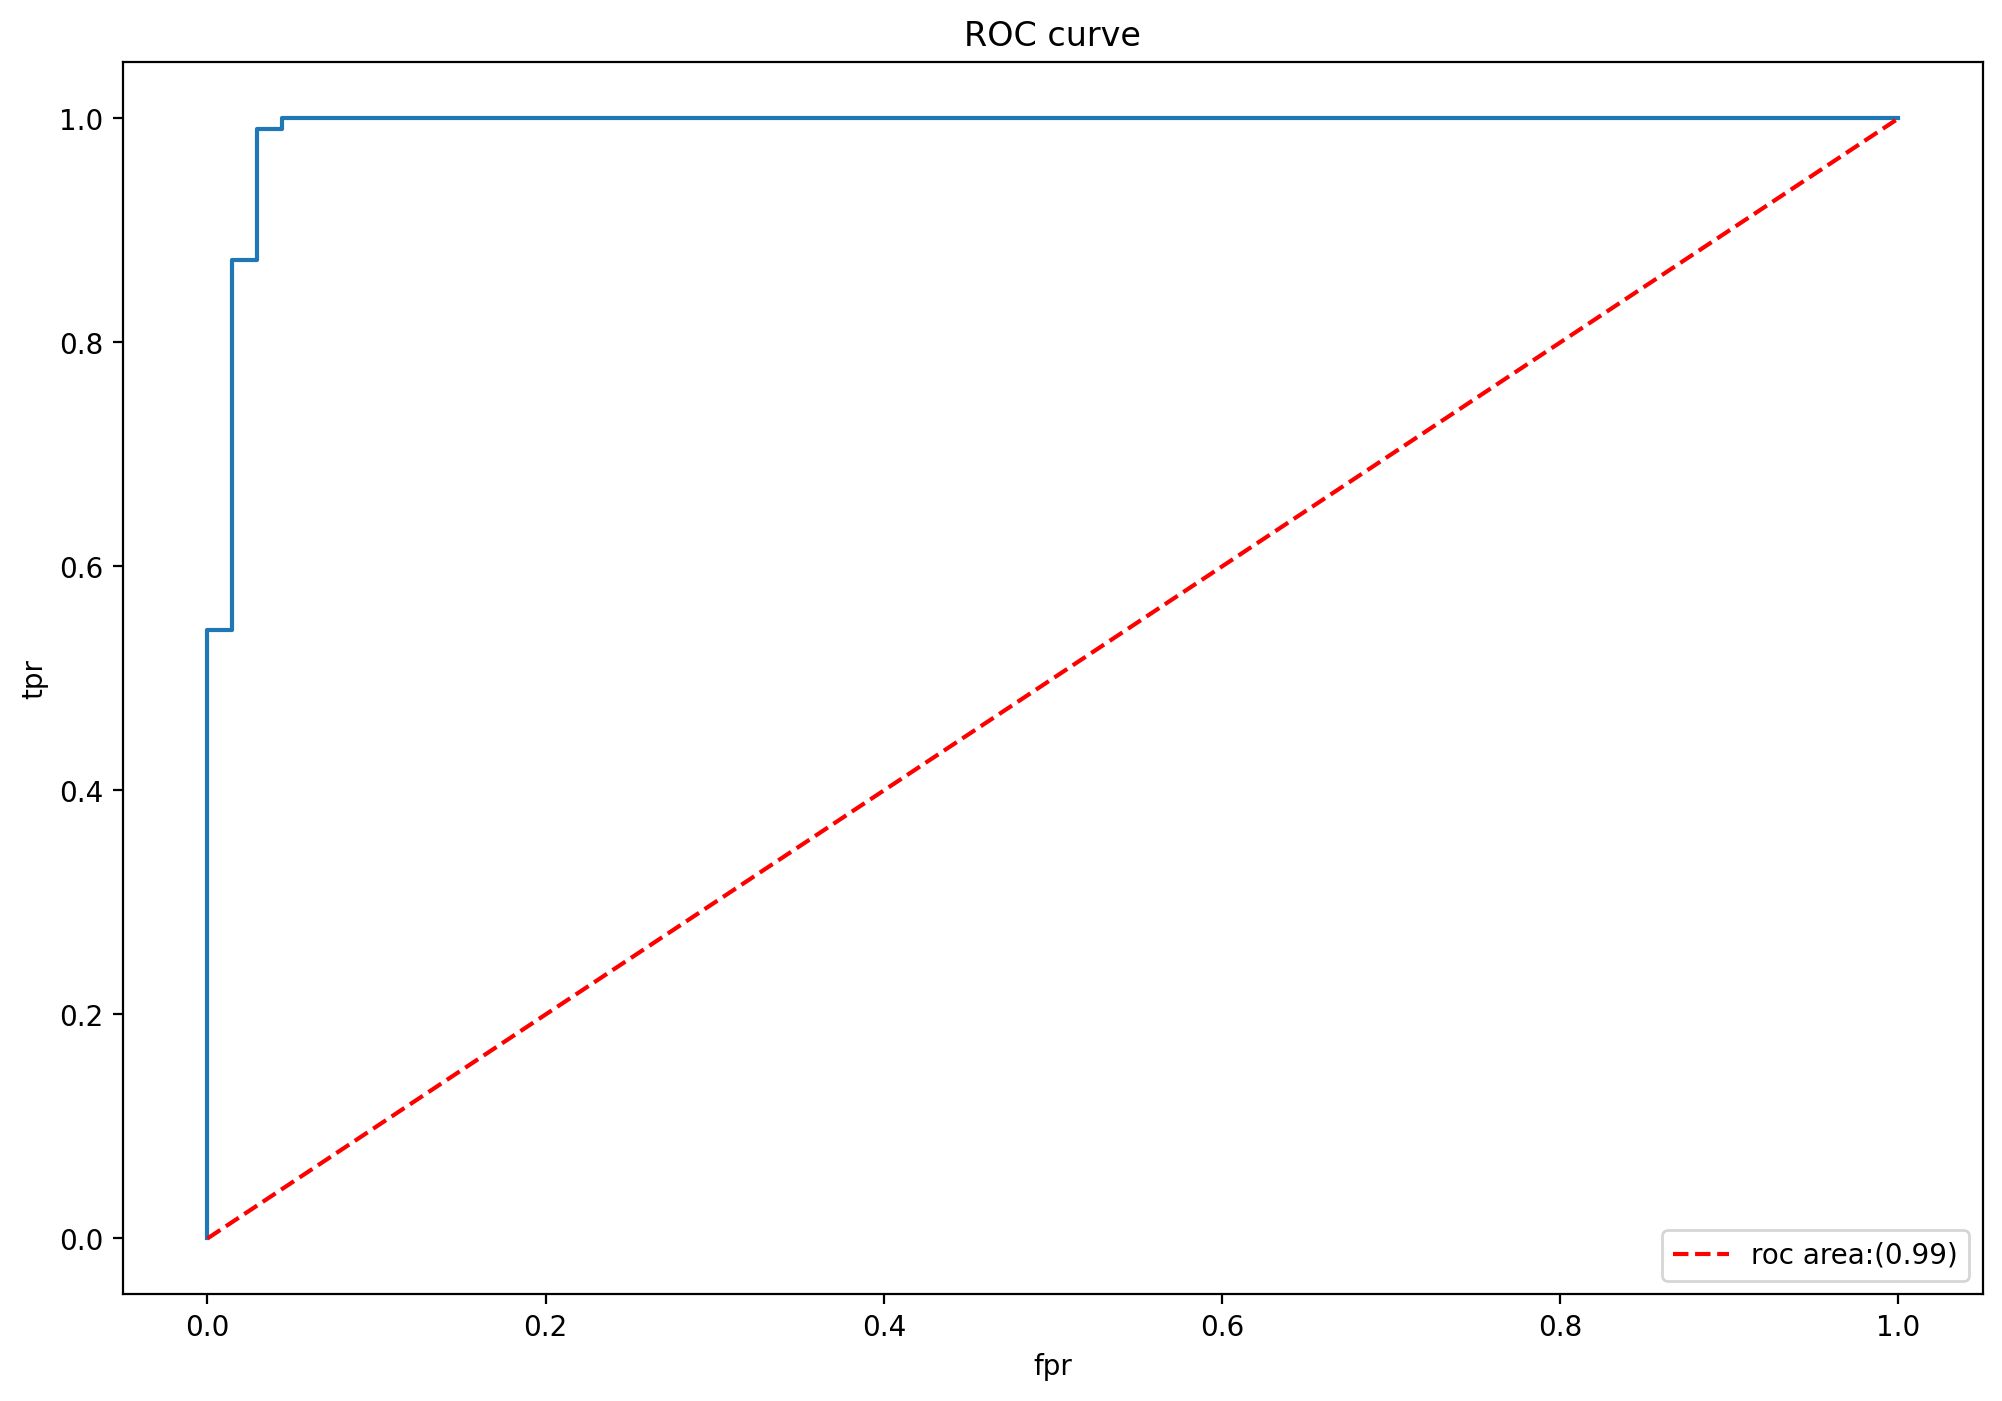

In [139]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='roc area:(%0.2f)' % auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend()

## ROC PR

In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, prob_pred)

In [145]:
print(f'Precision: {precision}, \nRecall: {recall}, \nThresholds: {thresholds}')

Precision: [0.60233918 0.60588235 0.60946746 0.61309524 0.61676647 0.62048193
 0.62424242 0.62804878 0.63190184 0.63580247 0.63975155 0.64375
 0.64779874 0.65189873 0.65605096 0.66025641 0.66451613 0.66883117
 0.67320261 0.67763158 0.68211921 0.68666667 0.69127517 0.69594595
 0.70068027 0.70547945 0.71034483 0.71527778 0.72027972 0.72535211
 0.73049645 0.73571429 0.74100719 0.74637681 0.75182482 0.75735294
 0.76296296 0.76865672 0.77443609 0.78030303 0.78625954 0.79230769
 0.79844961 0.8046875  0.81102362 0.81746032 0.824      0.83064516
 0.83739837 0.8442623  0.85123967 0.85833333 0.86554622 0.87288136
 0.88034188 0.88793103 0.89565217 0.90350877 0.91150442 0.91964286
 0.92792793 0.93636364 0.94495413 0.9537037  0.96261682 0.97169811
 0.97142857 0.98076923 0.98058252 0.98039216 0.98019802 0.98
 0.97979798 0.97959184 0.97938144 0.97916667 0.97894737 0.9787234
 0.97849462 0.97826087 0.98901099 0.98888889 0.98876404 0.98863636
 0.98850575 0.98837209 0.98823529 0.98809524 0.98795181 0.987

Text(0.5, 1.0, 'ROC PR')

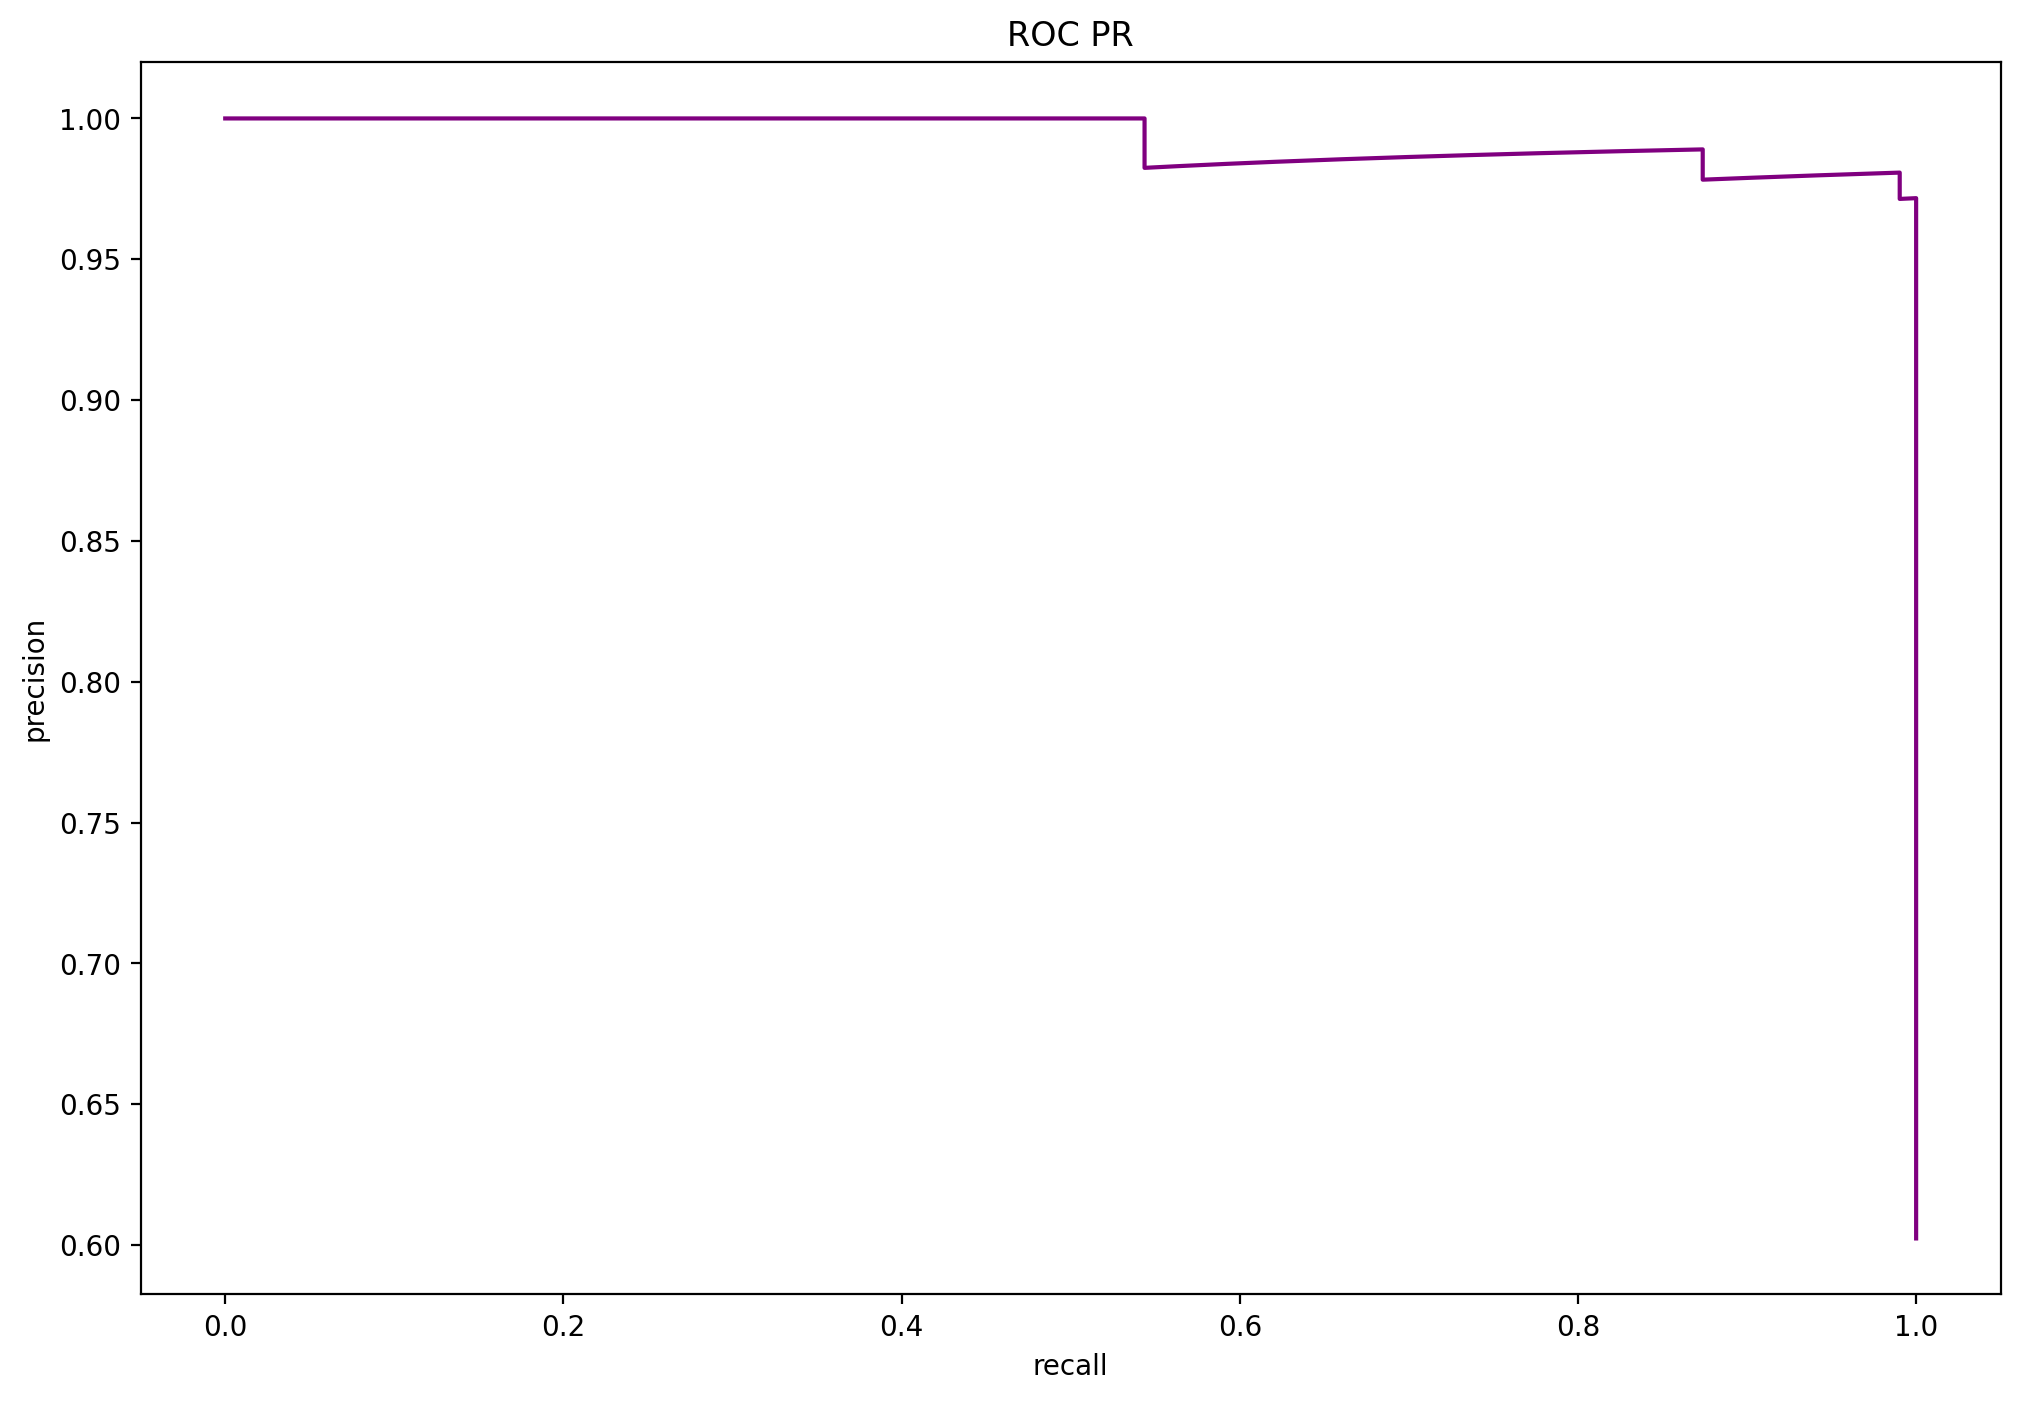

In [152]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(recall, precision, color='purple')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('ROC PR')